In [8]:
## 导入库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import lightgbm as lgb

In [9]:
# 设置图像清晰
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 加载数据
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [16]:
# 转为 DataFrame，方便分析
X = df.drop('dx', axis=1)
y = df['dx']

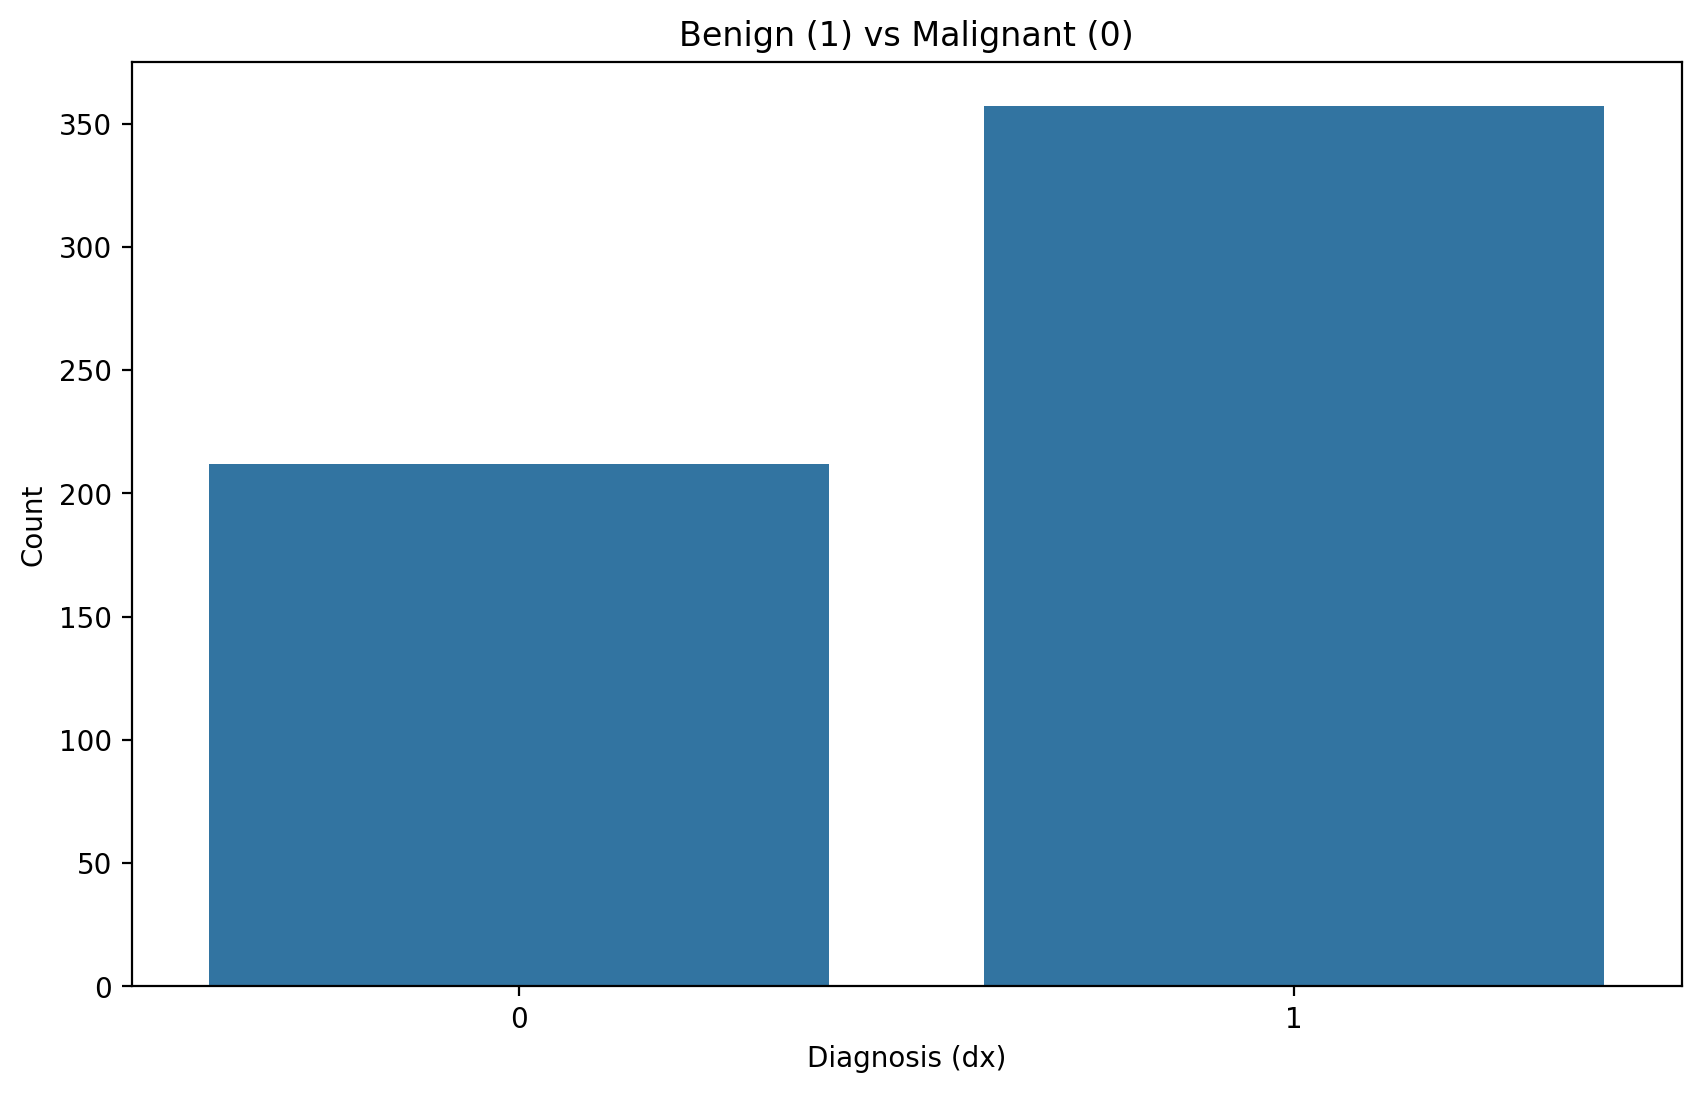

In [17]:
# 查看标签分布
plt.figure(figsize=(10, 6))
sns.countplot(x='dx', data=df)
plt.title("Benign (1) vs Malignant (0)")
plt.xlabel("Diagnosis (dx)")
plt.ylabel("Count")
plt.show()

In [31]:
# 正确的数据拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1898)

# 模型训练
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 260, number of negative: 138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3972
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.653266 -> initscore=0.633428
[LightGBM] [Info] Start training from score 0.633428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier()

Accuracy: 0.9824561403508771

Confusion Matrix:
 [[72  2]
 [ 1 96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        74
           1       0.98      0.99      0.98        97

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



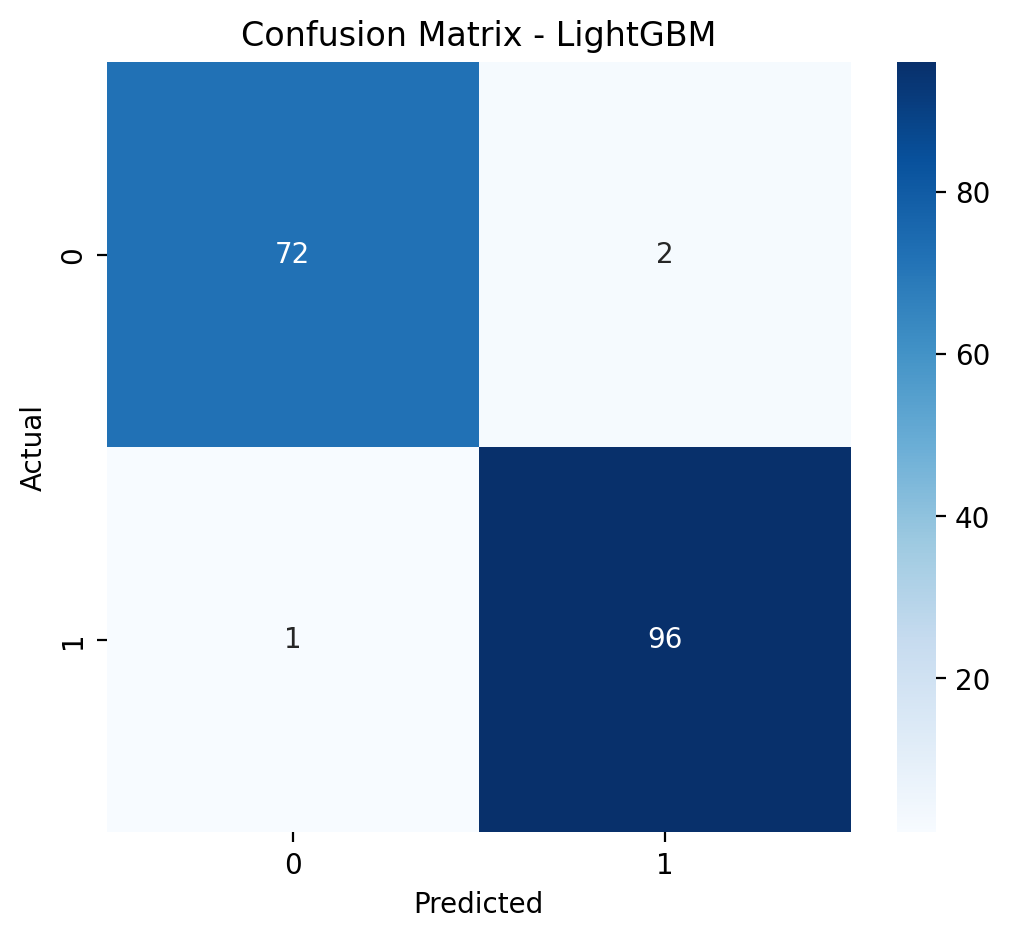

Train Accuracy: 1.0


In [32]:
# 预测并评估（测试集）
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# 可视化混淆矩阵
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM")
plt.show()
# 查看训练集准确率（检查过拟合）
y_train_pred = clf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

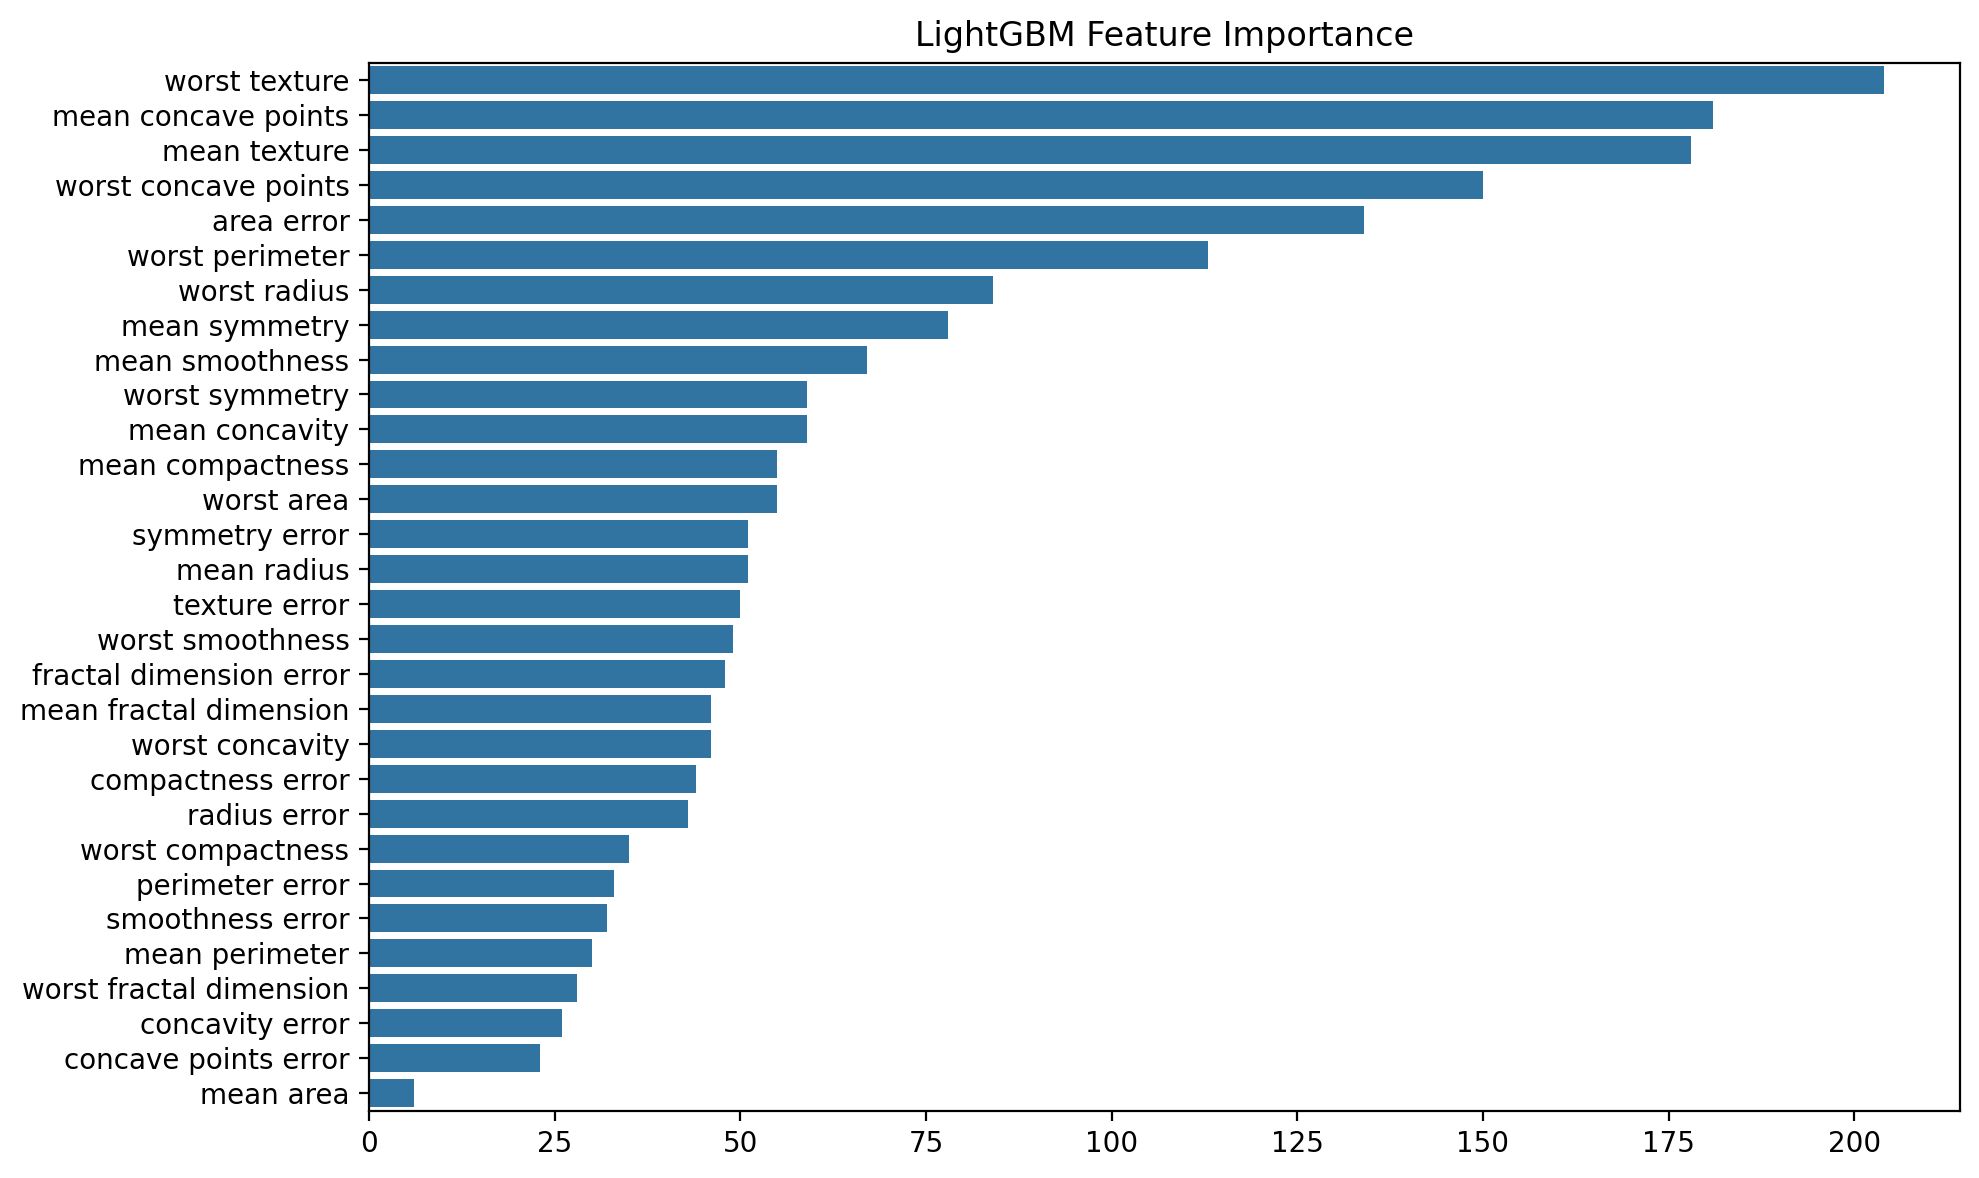

In [33]:
# 特征重要性可视化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importances = clf.feature_importances_
features = df.columns[:-1]  # df 中 dx 是最后一列
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("LightGBM Feature Importance")
sns.barplot(x=importances[indices], y=np.array(features)[indices])
plt.tight_layout()
plt.show()